In [ ]:
# Check GPU type
!nvidia-smi


Sat Dec  6 20:22:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics roboflow --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 99.9 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
from roboflow import Roboflow
import os


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# --- Replace with your credentials ---
from roboflow import Roboflow
rf = Roboflow(api_key="McrhzGgUVuaQbO2a1BX6")
project = rf.workspace("chandai").project("lunar-scene-analysis-fejkh")
version = project.version(5)
dataset = version.download("yolov11")

dataset.location


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Lunar-Scene-Analysis-5 in yolov11:: 100%|██████████| 2484/2484 [00:00<00:00, 6187.79it/s]


'/content/Lunar-Scene-Analysis-5'

In [5]:
yaml_content = """
  train: /content/Lunar-Scene-Analysis-5/train
  val: /content/Lunar-Scene-Analysis-5/valid
  test: /content/Lunar-Scene-Analysis-5/test

  nc: 6

  names:
    - artifact
    - boulder
    - crater
    - rock
    - rocky_region
    - rover path
  """

with open('/content/Lunar-Scene-Analysis-5/dataset.yaml', 'w') as f:
    f.write(yaml_content)

print("dataset.yaml created!")


dataset.yaml created!


In [ ]:
!ls /content/Lunar-Scene-Analysis-5/train

images	labels


In [6]:
# Choose your model
model = YOLO("yolo11l-seg.pt")   # segmentation model

# Train
results = model.train(
  data="/content/Lunar-Scene-Analysis-5/dataset.yaml",
    epochs=100,
    imgsz=640,
    batch=8,
    workers=4,
    optimizer="SGD",
    lr0=0.01,
    lrf=0.1,
    device=0,          # Use GPU
    project="yolov11_seg_results",
    name="train_run",
    close_mosaic=15
)


Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=15, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Lunar-Scene-Analysis-5/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, perspective=0.0,

In [7]:
!zip -r yolov11_large_trained_model.zip /content/yolov11_seg_results/train_run
from google.colab import files
files.download("yolov11_ltrained_model.zip")


  adding: content/yolov11_seg_results/train_run/ (stored 0%)
  adding: content/yolov11_seg_results/train_run/val_batch1_labels.jpg (deflated 6%)
  adding: content/yolov11_seg_results/train_run/BoxR_curve.png (deflated 8%)
  adding: content/yolov11_seg_results/train_run/train_batch2.jpg (deflated 6%)
  adding: content/yolov11_seg_results/train_run/MaskR_curve.png (deflated 8%)
  adding: content/yolov11_seg_results/train_run/val_batch2_labels.jpg (deflated 4%)
  adding: content/yolov11_seg_results/train_run/MaskPR_curve.png (deflated 10%)
  adding: content/yolov11_seg_results/train_run/train_batch11647.jpg (deflated 10%)
  adding: content/yolov11_seg_results/train_run/val_batch1_pred.jpg (deflated 6%)
  adding: content/yolov11_seg_results/train_run/MaskF1_curve.png (deflated 7%)
  adding: content/yolov11_seg_results/train_run/BoxPR_curve.png (deflated 10%)
  adding: content/yolov11_seg_results/train_run/confusion_matrix.png (deflated 25%)
  adding: content/yolov11_seg_results/train_run/c

FileNotFoundError: Cannot find file: yolov11_large_trained_model.zip

In [8]:
!zip -r yolov11_large_trained_model.zip /content/yolov11_seg_results/train_run
from google.colab import files
files.download("yolov11_large_trained_model.zip")


  adding: content/yolov11_seg_results/train_run/ (stored 0%)
  adding: content/yolov11_seg_results/train_run/val_batch1_labels.jpg (deflated 6%)
  adding: content/yolov11_seg_results/train_run/BoxR_curve.png (deflated 8%)
  adding: content/yolov11_seg_results/train_run/train_batch2.jpg (deflated 6%)
  adding: content/yolov11_seg_results/train_run/MaskR_curve.png (deflated 8%)
  adding: content/yolov11_seg_results/train_run/val_batch2_labels.jpg (deflated 4%)
  adding: content/yolov11_seg_results/train_run/MaskPR_curve.png (deflated 10%)
  adding: content/yolov11_seg_results/train_run/train_batch11647.jpg (deflated 10%)
  adding: content/yolov11_seg_results/train_run/val_batch1_pred.jpg (deflated 6%)
  adding: content/yolov11_seg_results/train_run/MaskF1_curve.png (deflated 7%)
  adding: content/yolov11_seg_results/train_run/BoxPR_curve.png (deflated 10%)
  adding: content/yolov11_seg_results/train_run/confusion_matrix.png (deflated 25%)
  adding: content/yolov11_seg_results/train_run/c

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

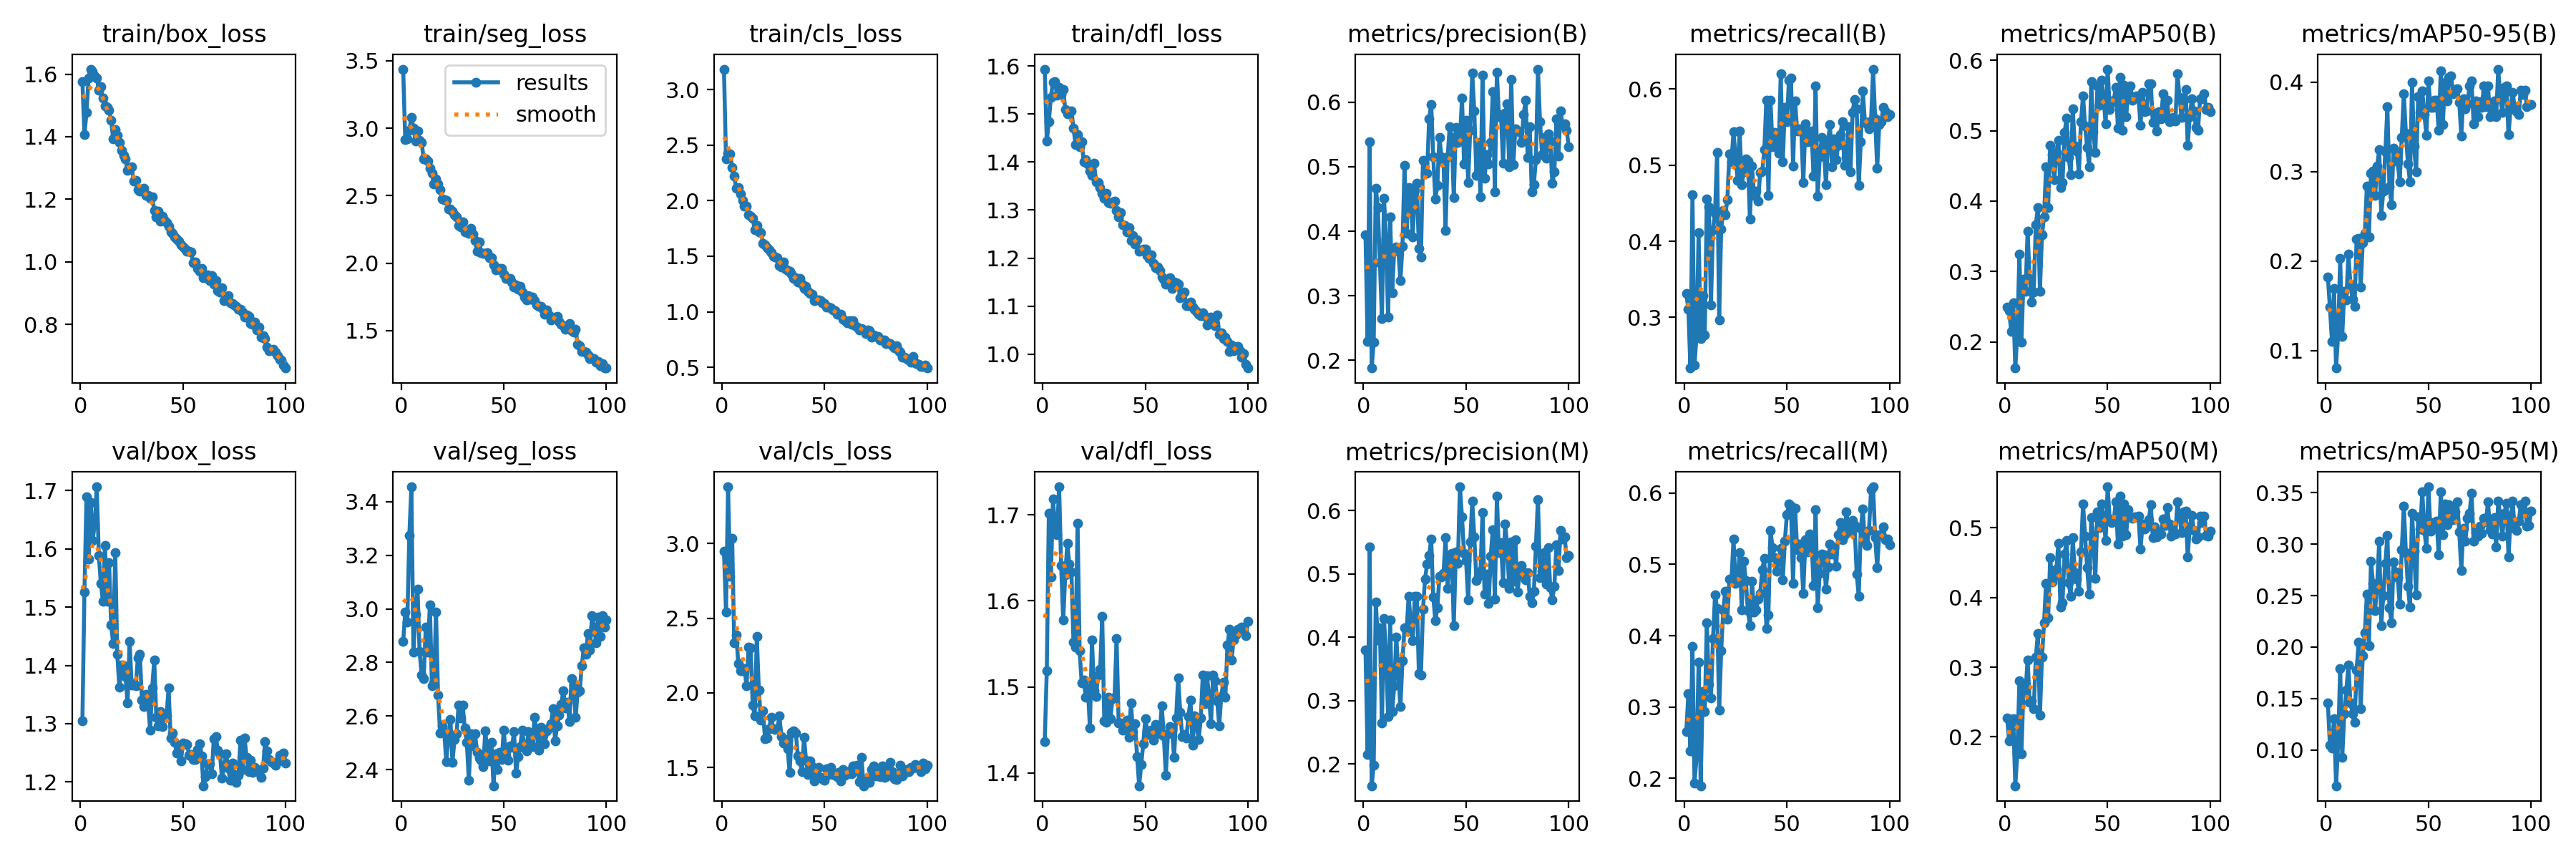

In [10]:
from IPython.display import Image

Image(filename="yolov11_seg_results/train_run/results.png")


In [11]:
metrics = model.val()
metrics


Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l-seg summary (fused): 203 layers, 27,589,218 parameters, 0 gradients, 131.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1390.0±512.7 MB/s, size: 40.5 KB)
val: Scanning /content/Lunar-Scene-Analysis-5/valid/labels.cache... 99 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 99/99 181.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 1.0s/it 7.2s
                   all         99        399      0.552      0.534      0.576      0.412      0.498      0.527      0.545      0.349
              artifact         35         55      0.667      0.836      0.807       0.67      0.661      0.909      0.817      0.618
               boulder          4          5      0.375        0.6      0.689      0.603      0.351        0.6      0.689      0.573
                crater        

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f366ccaa2d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004

In [12]:
from google.colab import files
uploaded = files.upload()

test_image = list(uploaded.keys())[0]
print("Testing on:", test_image)

results = model.predict(
    test_image,
    save=True,
    imgsz=640,
    conf=0.3
)

results


Saving render0015.png to render0015.png
Testing on: render0015.png

image 1/1 /content/render0015.png: 448x640 1 boulder, 1 crater, 2 rocks, 68.4ms
Speed: 2.3ms preprocess, 68.4ms inference, 28.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/segment/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'artifact', 1: 'boulder', 2: 'crater', 3: 'rock', 4: 'rocky_region', 5: 'rover path'}
 obb: None
 orig_img: array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        ...,
 
        [[ 77,  77,  77],
         [ 72,  72,  72],
         [ 91,  92,  92],
         ...,
         [149, 150, 149],
         [158, 158, 159],
         [156, 156, 156]],
 

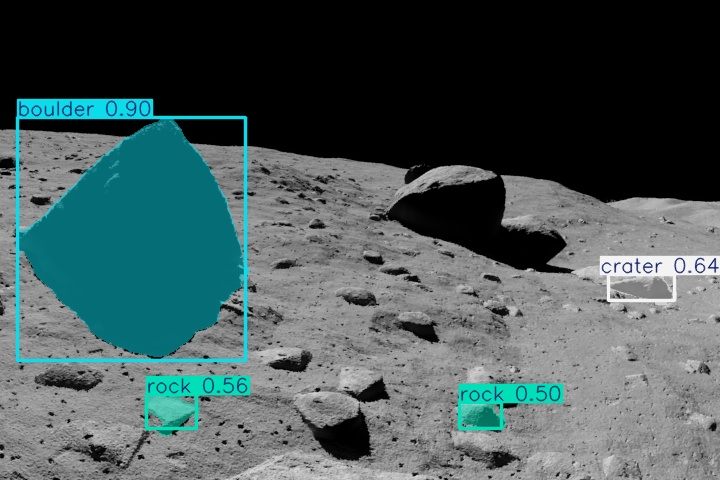

In [13]:
import glob
from IPython.display import Image

output_path = glob.glob("runs/segment/predict/*.jpg")[0]
Image(filename=output_path)


In [ ]:
model.export(format="onnx")
model.export(format="engine")   # TensorRT (requires environment)
